In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as  plt

import seaborn as sns

In [2]:
test_credit = pd.read_csv('test_data.csv')

train_credit = pd.read_csv('train_data.csv')

In [3]:
test_credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
train_credit.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
def check_duplicates(df, name="Dataset"):
    """Function to check and report duplicate rows in a dataset."""
    duplicates = df.duplicated().sum()
    print(f"Number of duplicate rows in {name}: {duplicates}")

# Check for duplicates in train and test datasets
check_duplicates(train_credit, "Train Data")
check_duplicates(test_credit, "Test Data")

Number of duplicate rows in Train Data: 0
Number of duplicate rows in Test Data: 0


In [6]:
def check_missing_values(df, name="Dataset"):
    """Function to check missing values and dataset size."""
    total_rows = df.shape[0]
    missing_data = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "% Missing": (df.isnull().sum().values / total_rows) * 100
    })
    
    print(f"Missing Values Report for {name} (Total Rows: {total_rows}):\n")
    print(missing_data)
    print("\n" + "="*50 + "\n")

# Run the function for both datasets
check_missing_values(train_credit, "Train Data")
check_missing_values(test_credit, "Test Data")

Missing Values Report for Train Data (Total Rows: 614):

          Column Name Data Type  Missing Values  % Missing
0             Loan_ID    object               0   0.000000
1              Gender    object              13   2.117264
2             Married    object               3   0.488599
3          Dependents    object              15   2.442997
4           Education    object               0   0.000000
5       Self_Employed    object              32   5.211726
6     ApplicantIncome     int64               0   0.000000
7   CoapplicantIncome   float64               0   0.000000
8          LoanAmount   float64              22   3.583062
9    Loan_Amount_Term   float64              14   2.280130
10     Credit_History   float64              50   8.143322
11      Property_Area    object               0   0.000000
12        Loan_Status    object               0   0.000000


Missing Values Report for Test Data (Total Rows: 367):

          Column Name Data Type  Missing Values  % Missing


In [7]:
def unique_entries_categorical(df, name="Dataset", exclude_cols=None):
    """Function to display unique values for each categorical variable except excluded columns."""
    if exclude_cols is None:
        exclude_cols = []
    
    print(f"Unique Entries for Categorical Variables in {name} (excluding {exclude_cols}):\n")
    
    # Select categorical columns excluding specified ones
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    categorical_cols = [col for col in categorical_cols if col not in exclude_cols]
    
    for col in categorical_cols:
        unique_values = df[col].unique()
        print(f"Column: {col}\nUnique Values: {unique_values}\n{'-'*50}")
    
    print("\n" + "="*50 + "\n")

# Run the function for both datasets, excluding 'id' column
unique_entries_categorical(train_credit, "Train Data", exclude_cols=['Loan_ID'])
unique_entries_categorical(test_credit, "Test Data", exclude_cols=['Loan_ID'])

Unique Entries for Categorical Variables in Train Data (excluding ['Loan_ID']):

Column: Gender
Unique Values: ['Male' 'Female' nan]
--------------------------------------------------
Column: Married
Unique Values: ['No' 'Yes' nan]
--------------------------------------------------
Column: Dependents
Unique Values: ['0' '1' '2' '3+' nan]
--------------------------------------------------
Column: Education
Unique Values: ['Graduate' 'Not Graduate']
--------------------------------------------------
Column: Self_Employed
Unique Values: ['No' 'Yes' nan]
--------------------------------------------------
Column: Property_Area
Unique Values: ['Urban' 'Rural' 'Semiurban']
--------------------------------------------------
Column: Loan_Status
Unique Values: ['Y' 'N']
--------------------------------------------------


Unique Entries for Categorical Variables in Test Data (excluding ['Loan_ID']):

Column: Gender
Unique Values: ['Male' 'Female' nan]
--------------------------------------------

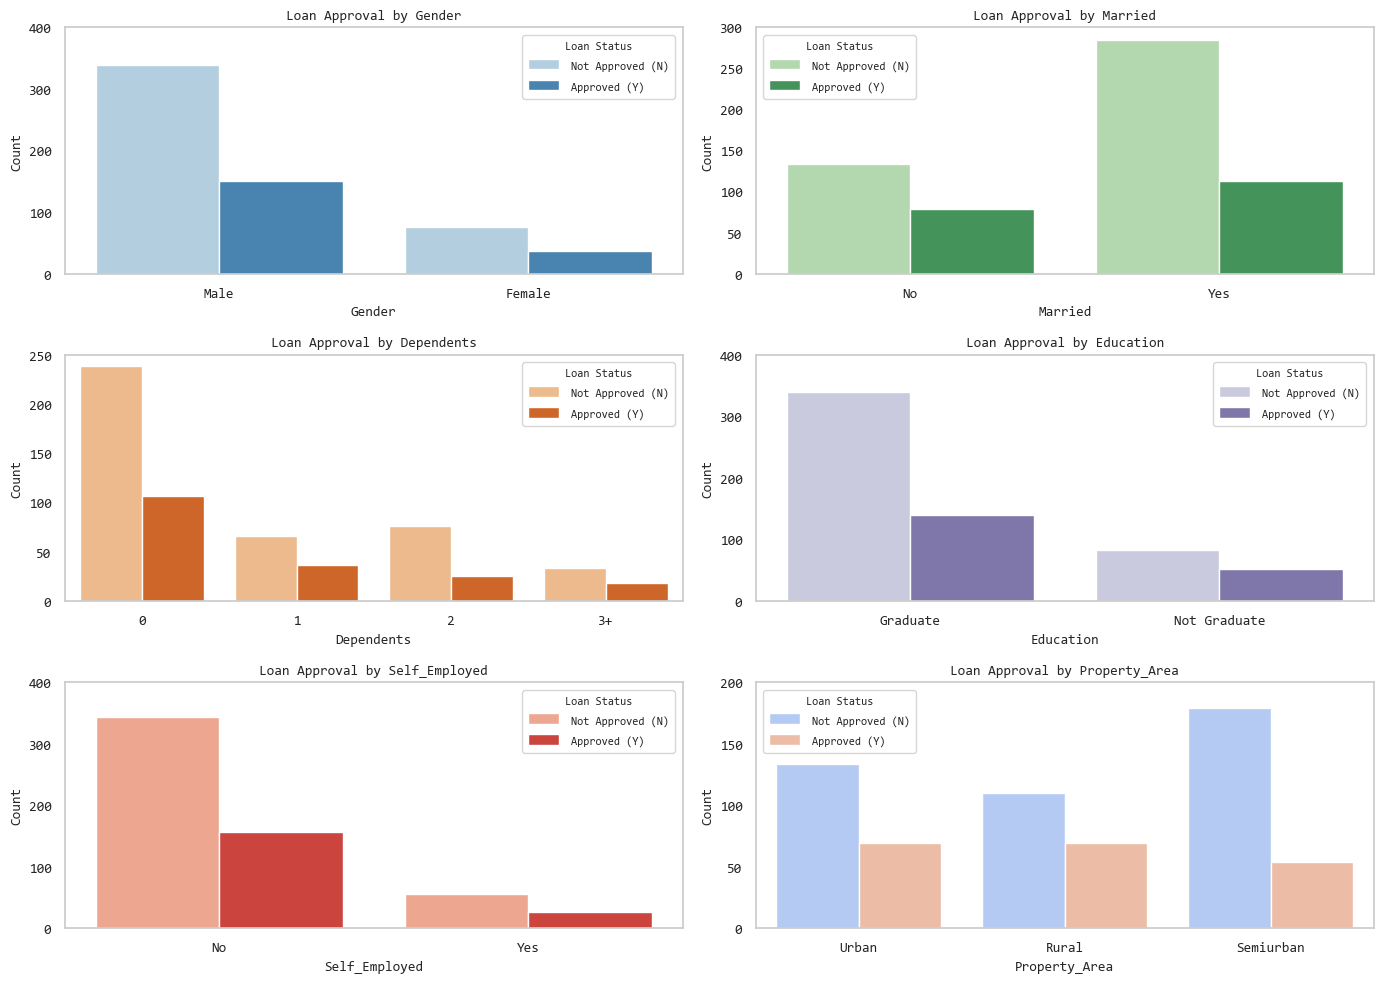

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Define key categorical variables
key_categorical = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]

# Define unique color palettes for each plot
color_palettes = [
    "Blues", "Greens", "Oranges", "Purples", "Reds", "coolwarm"
]

# Set figure size
plt.figure(figsize=(14, 10))

# Loop through each categorical variable
for i, col in enumerate(key_categorical, 1):
    plt.subplot(3, 2, i)  # Arrange in 3 rows, 2 columns
    
    # Set unique color palette for each plot
    colors = sns.color_palette(color_palettes[i-1], 2)
    
    # Create count plot without grid lines
    ax = sns.countplot(x=col, hue="Loan_Status", data=train_credit, palette=colors)
    ax.grid(False)  # Remove grid lines
    
    # Set labels and title with Consolas font, size 10
    plt.title(f"Loan Approval by {col}", fontname="Consolas", fontsize=10)
    plt.xlabel(col, fontname="Consolas", fontsize=10)
    plt.ylabel("Count", fontname="Consolas", fontsize=10)
    
    # Set x-axis and y-axis ticks to Consolas font
    ax.set_xticks(ax.get_xticks())  # Define tick positions
    ax.set_xticklabels(ax.get_xticklabels(), fontname="Consolas", fontsize=10)  # Apply font
    
    ax.set_yticks(ax.get_yticks())  # Define tick positions
    ax.set_yticklabels([int(tick) for tick in ax.get_yticks()], fontname="Consolas", fontsize=10)  # Apply font
    
    # Customize legend with Consolas font
    legend = plt.legend(title="Loan Status", labels=["Not Approved (N)", "Approved (Y)"])
    plt.setp(legend.get_title(), fontname="Consolas", fontsize=8)  # Legend title styling
    plt.setp(legend.get_texts(), fontname="Consolas", fontsize=8)  # Legend labels styling

# Adjust layout
plt.tight_layout()
plt.show()

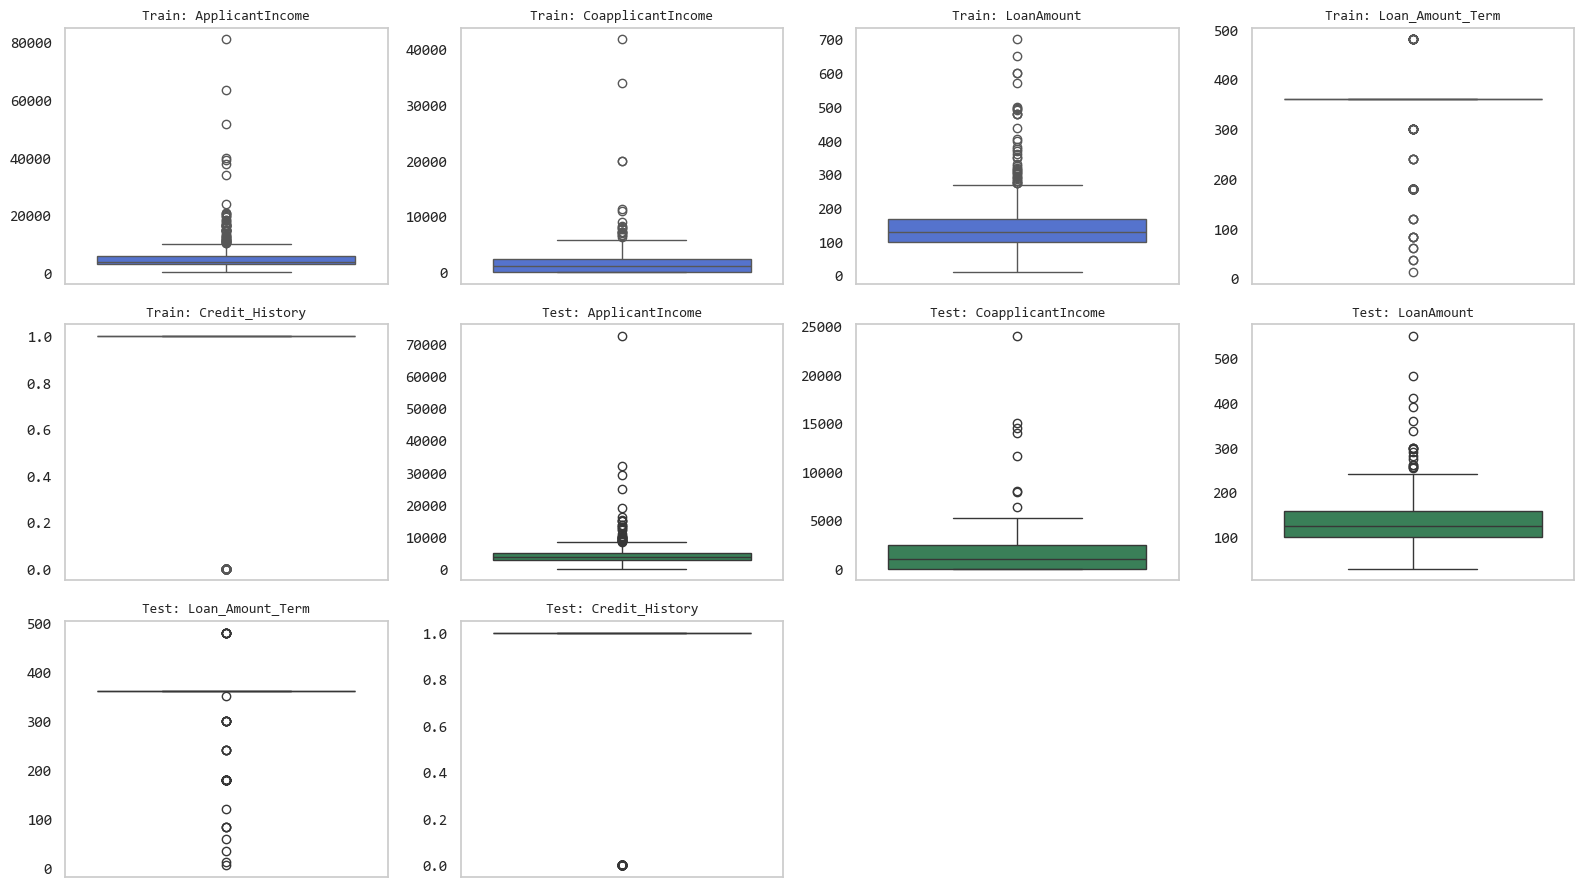

({'ApplicantIncome': 50,
  'CoapplicantIncome': 18,
  'LoanAmount': 39,
  'Loan_Amount_Term': 88,
  'Credit_History': 89},
 {'ApplicantIncome': 32,
  'CoapplicantIncome': 8,
  'LoanAmount': 18,
  'Loan_Amount_Term': 50,
  'Credit_History': 59})

In [9]:
numeric_cols_train = train_credit.select_dtypes(include=['number']).columns
numeric_cols_test = test_credit.select_dtypes(include=['number']).columns

# Set visualization styles
plt.rcParams["font.family"] = "Consolas"
plt.rcParams["font.size"] = 12

# Function to detect outliers using IQR
def detect_outliers(df, numeric_cols):
    outliers = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    return outliers

# Detect outliers for train and test datasets
outliers_train = detect_outliers(train_credit, numeric_cols_train)
outliers_test = detect_outliers(test_credit, numeric_cols_test)

colors_train = sns.color_palette("Blues", len(numeric_cols_train))
colors_test = sns.color_palette("Greens", len(numeric_cols_test))

# Set grid size dynamically
num_plots = len(numeric_cols_train) + len(numeric_cols_test)
grid_size = int(np.ceil(np.sqrt(num_plots)))

# Plot boxplots
fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 4, grid_size * 3))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_train):
    sns.boxplot(y=train_credit[col], ax=axes[i], color="royalblue")
    axes[i].set_title(f"Train: {col}", fontsize=10)
    axes[i].set_ylabel("")
    axes[i].grid(False)  # Remove grid

for i, col in enumerate(numeric_cols_test, start=len(numeric_cols_train)):
    sns.boxplot(y=test_credit[col], ax=axes[i], color="seagreen")
    axes[i].set_title(f"Test: {col}", fontsize=10)
    axes[i].set_ylabel("")
    axes[i].grid(False)  # Remove grid

# Hide unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Display number of outliers per column in train and test datasets
outlier_counts_train = {col: len(outliers_train[col]) for col in outliers_train}
outlier_counts_test = {col: len(outliers_test[col]) for col in outliers_test}

outlier_counts_train, outlier_counts_test


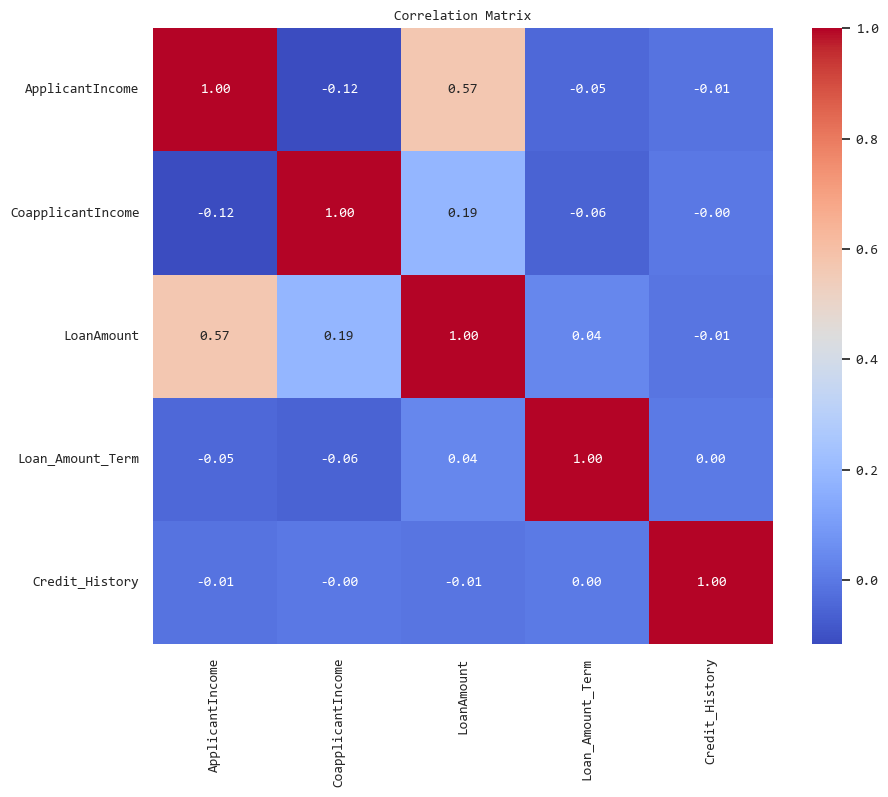

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numeric columns
numeric_data = train_credit.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Define figure size
fig, ax = plt.subplots(figsize=(10, 8))

# Custom colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create heatmap with annotations
heatmap = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    linewidths=0,
    ax=ax,
    annot_kws={"fontsize": 10, "fontname": "Consolas"}  # Font for correlation values
)

# Set title and labels with Consolas font
ax.set_title("Correlation Matrix", fontname="Consolas", fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), fontname="Consolas", fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), fontname="Consolas", fontsize=10)

# Fix color bar font
cbar = heatmap.collections[0].colorbar
cbar.ax.yaxis.set_tick_params(labelsize=10)
for label in cbar.ax.get_yticklabels():
    label.set_fontname("Consolas")

# Show plot
plt.show()

In [12]:
import pandas as pd

def check_missing_values(df, name="Dataset"):
    """Function to check and display only columns with missing values."""
    total_rows = df.shape[0]
    missing_data = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "% Missing": (df.isnull().sum().values / total_rows) * 100
    })
    
    # Filter to show only columns with missing values
    missing_data = missing_data[missing_data["Missing Values"] > 0]

    print(f"Missing Values Report for {name} (Total Rows: {total_rows}):\n")
    if missing_data.empty:
        print("No missing values detected.\n")
    else:
        print(missing_data)
    print("\n" + "="*50 + "\n")

# Run the function for both datasets
check_missing_values(train_credit, "Train Data")
check_missing_values(test_credit, "Test Data")

Missing Values Report for Train Data (Total Rows: 614):

         Column Name Data Type  Missing Values  % Missing
1             Gender    object              13   2.117264
2            Married    object               3   0.488599
3         Dependents    object              15   2.442997
5      Self_Employed    object              32   5.211726
8         LoanAmount   float64              22   3.583062
9   Loan_Amount_Term   float64              14   2.280130
10    Credit_History   float64              50   8.143322


Missing Values Report for Test Data (Total Rows: 367):

         Column Name Data Type  Missing Values  % Missing
1             Gender    object              11   2.997275
3         Dependents    object              10   2.724796
5      Self_Employed    object              23   6.267030
8         LoanAmount   float64               5   1.362398
9   Loan_Amount_Term   float64               6   1.634877
10    Credit_History   float64              29   7.901907




In [13]:
import pandas as pd

# Assuming train_credit and test_credit are already loaded

# Drop rows with any missing values
train_credit = train_credit.dropna(axis=0)  # axis=0 drops rows
test_credit = test_credit.dropna(axis=0)   # axis=0 drops rows

def check_missing_values(df, name="Dataset"):
    """Function to check and display only columns with missing values."""
    total_rows = df.shape[0]
    missing_data = pd.DataFrame({
        "Column Name": df.columns,
        "Data Type": df.dtypes.values,
        "Missing Values": df.isnull().sum().values,
        "% Missing": (df.isnull().sum().values / total_rows) * 100
    })
    
    # Filter to show only columns with missing values
    missing_data = missing_data[missing_data["Missing Values"] > 0]

    print(f"Missing Values Report for {name} (Total Rows: {total_rows}):\n")
    if missing_data.empty:
        print("No missing values detected.\n")
    else:
        print(missing_data)
    print("\n" + "="*50 + "\n")

# Run the function for both datasets
check_missing_values(train_credit, "Train Data")
check_missing_values(test_credit, "Test Data")

print(f"Train_credit shape: {train_credit.shape}")
print(f"Test_credit shape: {test_credit.shape}")

Missing Values Report for Train Data (Total Rows: 480):

No missing values detected.



Missing Values Report for Test Data (Total Rows: 289):

No missing values detected.



Train_credit shape: (480, 13)
Test_credit shape: (289, 12)


In [14]:
# If you want to view the columns as a list:
print("Columns in train_credit (as a list):")
print(list(train_credit.columns))
print("\n")

print("Columns in test_credit (as a list):")
print(list(test_credit.columns))

Columns in train_credit (as a list):
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


Columns in test_credit (as a list):
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']


In [15]:
def check_missing_categorical(df, name="Dataset"):
    """Function to display categorical columns with missing values, their count, and a preview of available values."""
    total_rows = df.shape[0]
    
    # Select only categorical columns
    categorical_cols = df.select_dtypes(include=["object", "category"])
    
    # Find categorical columns with missing values
    missing_data = categorical_cols.isnull().sum()
    missing_columns = missing_data[missing_data > 0]

    print(f"🔍 Missing Values Report for Categorical Variables in {name} (Total Rows: {total_rows}):\n")

    if missing_columns.empty:
        print("✅ No missing values in categorical columns.\n")
    else:
        for col in missing_columns.index:
            print(f"🛑 **Column:** {col}")
            print(f"   - Missing Count: {missing_columns[col]}")
            print(f"   - % Missing: {round((missing_columns[col] / total_rows) * 100, 2)}%")
            print(f"   - Sample Available Values: {df[col].dropna().unique()[:5]}")  # Show unique non-null values
            print("\n" + "-"*50 + "\n")

# Run the function for both datasets
check_missing_categorical(train_credit, "Train Data")
check_missing_categorical(test_credit, "Test Data")

🔍 Missing Values Report for Categorical Variables in Train Data (Total Rows: 480):

✅ No missing values in categorical columns.

🔍 Missing Values Report for Categorical Variables in Test Data (Total Rows: 289):

✅ No missing values in categorical columns.



In [16]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols_train = train_credit.select_dtypes(include=['object']).columns
categorical_cols_test = test_credit.select_dtypes(include=['object']).columns

# Apply Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
for col in categorical_cols_train:
    if train_credit[col].nunique() == 2:
        train_credit[col] = label_encoder.fit_transform(train_credit[col])

for col in categorical_cols_test:
    if test_credit[col].nunique() == 2:
        test_credit[col] = label_encoder.fit_transform(test_credit[col])

# Apply One-Hot Encoding for categorical variables with more than two unique categories
train_credit = pd.get_dummies(train_credit, columns=[col for col in categorical_cols_train if train_credit[col].nunique() > 2], drop_first=True)
test_credit = pd.get_dummies(test_credit, columns=[col for col in categorical_cols_test if test_credit[col].nunique() > 2], drop_first=True)

# Ensure both datasets have the same columns after encoding
train_credit, test_credit = train_credit.align(test_credit, join="left", axis=1, fill_value=0)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you already have your data loaded as train_credit and test_credit
# and preprocessed as in the previous examples

# Prepare data for modeling
X = train_credit.drop('Loan_Status', axis=1)
y = train_credit['Loan_Status']
X_test_final = test_credit.drop('Loan_Status', axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test_final)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the models and their parameter grids for GridSearchCV
models = {
    "Logistic Regression (LR)": (LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced'), {'C': [0.1, 1, 10]}),
    "Decision Tree (DT)": (DecisionTreeClassifier(random_state=42, class_weight='balanced'), {'max_depth': [3, 5, 7]}),
    "Random Forest (RF)": (RandomForestClassifier(random_state=42, class_weight='balanced'), {'n_estimators': [50, 100, 200]}),
    "Extra Trees (ET)": (ExtraTreesClassifier(random_state=42, class_weight='balanced'), {'n_estimators': [50, 100, 200]}),
    "Support Vector Machine (SVM)": (SVC(random_state=42, class_weight='balanced'), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    "K-Nearest Neighbors (KNN)": (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    "Gaussian Naive Bayes (GNB)": (GaussianNB(), {}),  # No parameters to tune
    "AdaBoost (AdB)": (AdaBoostClassifier(random_state=42), {'n_estimators': [50, 100]}),
    "Gradient Boosting Classifier (GBC)": (GradientBoostingClassifier(random_state=42), {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}),
    "Dense Neural Network (DNN)": (MLPClassifier(random_state=42, max_iter=500), {'hidden_layer_sizes': [(100,), (50, 50)], 'alpha': [0.0001, 0.001]}),
}

# Train and evaluate each model using GridSearchCV for hyperparameter tuning
results = {}
for name, (model, param_grid) in models.items():
    grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy', verbose=0) # reduced verbosity
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_val_pred = best_model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    results[name] = accuracy
    print(f"\n{name} Validation Accuracy: {accuracy:.4f}")
    print(classification_report(y_val, y_val_pred, zero_division=0)) # zero_division added
    y_test_pred = best_model.predict(X_test_scaled)
    print(f"{name} Test Predictions:")
    print(y_test_pred)

# Print the results summary
print("\nModel Performance Summary:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")


Logistic Regression (LR) Validation Accuracy: 0.8229
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96

Logistic Regression (LR) Test Predictions:
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 